# Visualization of the locations of all ships

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from Utilities import *

import os
import pandas

from getABSDData import getABSDDataFrames

In [2]:
DATASET_FOLDER = "data"
TRAINING_ANNOTATION_FILE = os.path.join(DATASET_FOLDER, "train_ship_segmentations.csv")
TEST_ANNOTATION_FILE = os.path.join(DATASET_FOLDER, "test_ship_segmentations.csv")

with ElapsedTime("Pandas csv reading"):
        orig_train_data = pandas.read_csv(TRAINING_ANNOTATION_FILE)
with ElapsedTime("Pandas csv reading"):
        orig_test_data = pandas.read_csv(TEST_ANNOTATION_FILE)

def visualize(data):
    n_images = len(data.groupby('ImageId'))
    print("The dataset contains %d images." % n_images)

    #Removing rows, where no masks are present; getting the pixel information
    masks = data.dropna()
    img_masks = masks['EncodedPixels'].tolist()

    #At every pixel, for every mask, if there is a ship segmentation part, we add one to all_masks
    #Storing the number of ship occurances at every pixel this way
    all_masks = np.zeros((768, 768))
    for mask in img_masks:
        all_masks += annotation2Mask(mask)

    #We scale the matrix down to fit into the 0-255 range, 255 representing the pixels, at which on every image there is a ship
    #In this way we can represent the occurances in a greyscale image
    all_masks /= n_images
    all_masks *= 255
    
    return all_masks

all_masks_train_orig = visualize(orig_train_data)
all_masks_test_orig = visualize(orig_test_data)

# Getting train-dev-test splitted dataframes
train_data, dev_data, test_data = getABSDDataFrames()

all_masks_train = visualize(train_data)
all_masks_dev = visualize(dev_data)
all_masks_test = visualize(test_data)

Pandas csv reading was running for 0.588005 s
Pandas csv reading was running for 0.272002 s
The dataset contains 104070 images.
The dataset contains 88486 images.
The dataset contains 135174 images.
The dataset contains 38126 images.
The dataset contains 19256 images.


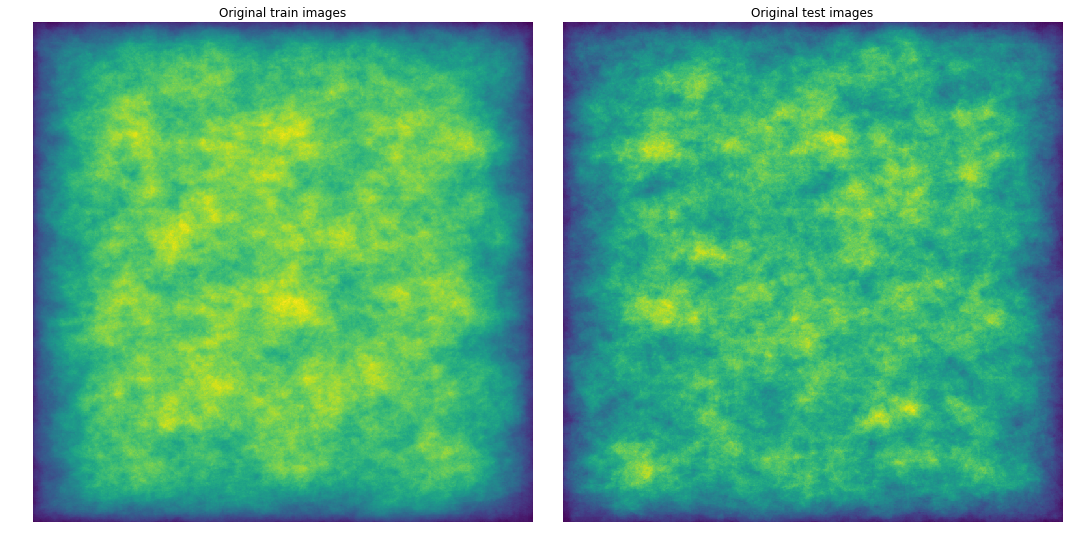

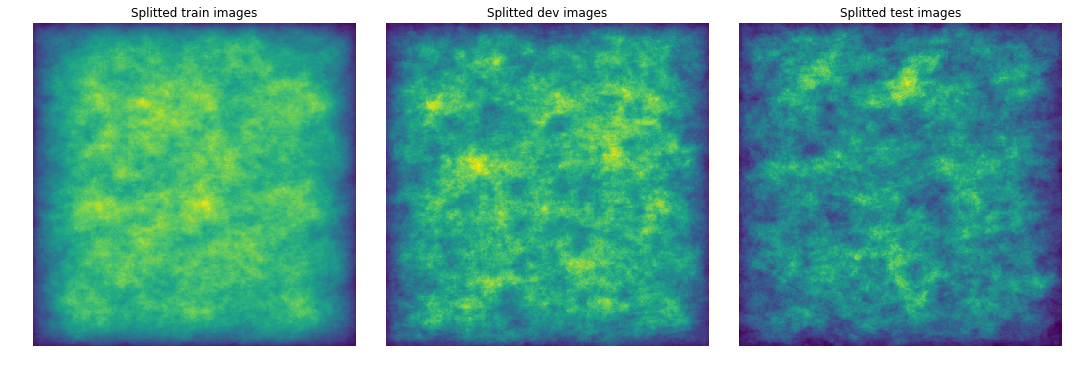

In [3]:
#PLotting occurance images
#Plotting original train and test occurances
fig1, axarr1 = plt.subplots(1, 2, figsize=(15, 40))
axarr1[0].axis('off')
axarr1[1].axis('off')
axarr1[0].set_title('Original train images')
axarr1[1].set_title('Original test images')
axarr1[0].imshow(all_masks_train_orig)
axarr1[1].imshow(all_masks_test_orig)

plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

#Plotting splitted train-dev-test occurances
fig2, axarr2 = plt.subplots(1, 3, figsize=(15, 40))
axarr2[0].axis('off')
axarr2[1].axis('off')
axarr2[2].axis('off')
axarr2[0].set_title('Splitted train images')
axarr2[1].set_title('Splitted dev images')
axarr2[2].set_title('Splitted test images')
axarr2[0].imshow(all_masks_train)
axarr2[1].imshow(all_masks_dev)
axarr2[2].imshow(all_masks_test)

plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()